# Salary Project
Problem Statement:
Problem Statement
Predict the salary if the employee using the features provided in the data. 

# LOADING IMPORTANT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# LOADING DATASET (CSV FILE)

In [64]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
df.head(10)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
5,AssocProf,B,6,6,Male,97000
6,Prof,B,30,23,Male,175000
7,Prof,B,45,45,Male,147765
8,Prof,B,21,20,Male,119250
9,Prof,B,18,18,Female,129000


# GETTING SHAPE OF THE DATASET

In [3]:
df.shape

(397, 6)

In [4]:

list(df.columns.values.tolist())

['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary']

# GETTING INFORMATION ABOUT DATASET

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


# CHECKING NULL VALUES 


In [6]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [7]:
#Checking null values for each column separately
for i in df.columns:
    print(i)
    print(df[i].isnull().sum())

rank
0
discipline
0
yrs.since.phd
0
yrs.service
0
sex
0
salary
0


# SUMMRIZE NUMERICAL AND CATAGORICL VARIBALES SEPARATLY

In [8]:
df.describe(include= [np.number])

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [9]:
df.describe(include= ['O'])

,rank,discipline,sex
count,397,397,397
unique,3,2,2
top,Prof,B,Male
freq,266,216,358


In [10]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [11]:
x

,rank,discipline,yrs.since.phd,yrs.service,sex
0,Prof,B,19,18,Male
1,Prof,B,20,16,Male
2,AsstProf,B,4,3,Male
3,Prof,B,45,39,Male
4,Prof,B,40,41,Male
...,...,...,...,...,...
392,Prof,A,33,30,Male
393,Prof,A,31,19,Male
394,Prof,A,42,25,Male
395,Prof,A,25,15,Male


In [12]:
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

# VISHUALIZE TARGET VARIABLE IN VIOLINPLOT

In [13]:
y.shape

(397,)

In [14]:
y.min()

57800

In [15]:
y.max()

231545

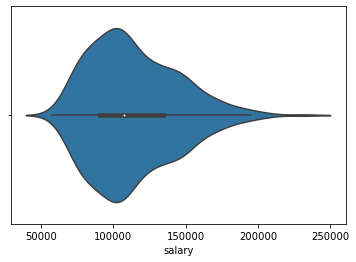

In [16]:

#create violinplot
sns.violinplot(x= 'salary',data=df)
#show the pd
plt.show()

# VISUALIZE THROUGH DIST PLOT


<AxesSubplot:xlabel='salary', ylabel='Density'>

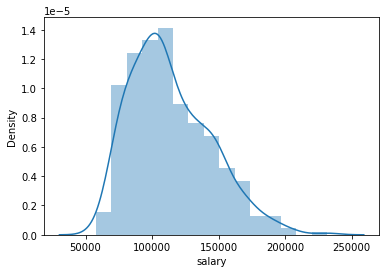

In [17]:
sns.distplot(df['salary'])

# VISUALIZE THROUGH BOX PLOT TO INVESTIGATE OUTLIERS


<AxesSubplot:xlabel='salary'>

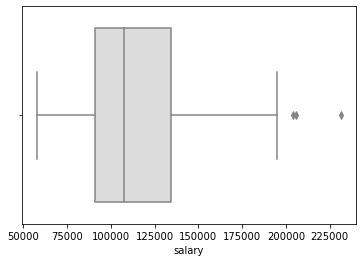

In [18]:
sns.boxplot(df['salary'],palette='coolwarm')

# EXAMINE POTENTIAL OUTLIERS

In [19]:
#Check potential outliers below lower bound
y[y < 88000].value_counts()

74000    4
72500    4
81500    2
77500    2
77000    2
        ..
76840    1
73877    1
79800    1
87800    1
81035    1
Name: salary, Length: 69, dtype: int64

In [20]:
y[y > 131000].value_counts()

163200    2
139750    1
150500    1
161101    1
135027    1
         ..
144651    1
156938    1
152664    1
136000    1
150564    1
Name: salary, Length: 108, dtype: int64

In [21]:
df[(df['rank']=='Prof')&(df['salary']>131000)].value_counts()


rank  discipline  yrs.since.phd  yrs.service  sex     salary
Prof  A           17             11           Male    148800    1
      B           23             19           Female  151768    1
                  26             27           Male    142500    1
                                 22           Male    150000    1
                                 19           Male    193000    1
                                                               ..
      A           40             19           Male    166605    1
                  39             38           Male    136500    1
                                                      133900    1
                                 36           Female  137000    1
      B           56             49           Male    186960    1
Length: 109, dtype: int64

We know from our intuition that starting from senior roles and above are very highly ranked and pays a tremendous amount of salary. 
Therefore, we look at junior roles and determine the upper outliers need to be deal in a special way

In [23]:
df[(df['rank']=='AsstProf')&(df['salary']>131000)].value_counts()

Series([], dtype: int64)

In [24]:
df[(df['rank']=='AsstProf')&(df['salary']<131000)].value_counts()

rank      discipline  yrs.since.phd  yrs.service  sex     salary
AsstProf  B           4              4            Male    92000     3
                      3              3            Male    89942     2
                      4              4            Male    92700     2
          A           2              0            Female  72500     1
          B           5              3            Male    82379     1
                                                                   ..
                      1              1            Male    70768     1
                                                          77700     1
                      2              0            Male    78000     1
                                     2            Male    88400     1
                      11             3            Female  74692     1
Length: 63, dtype: int64

In [25]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


<AxesSubplot:xlabel='rank', ylabel='salary'>

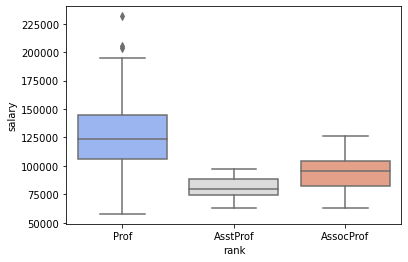

In [26]:
sns.boxplot(x='rank',y='salary',data=df,palette='coolwarm')

<AxesSubplot:xlabel='sex', ylabel='salary'>

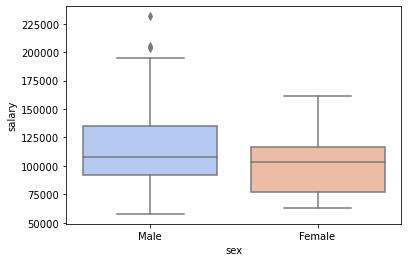

In [27]:
sns.boxplot(x='sex',y='salary',data=df,palette='coolwarm')

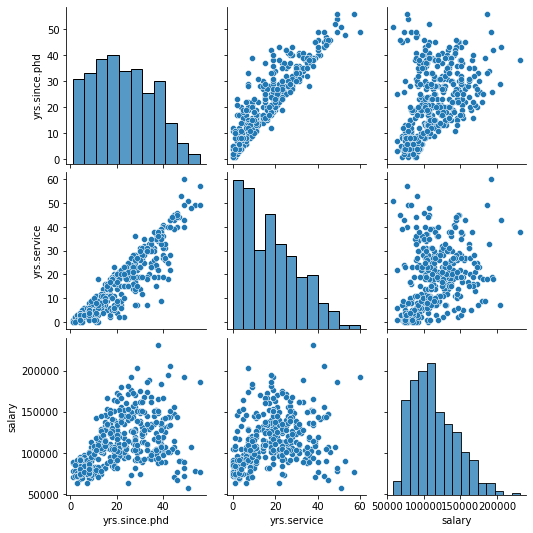

In [28]:
sns.pairplot(df)

<AxesSubplot:xlabel='salary', ylabel='Density'>

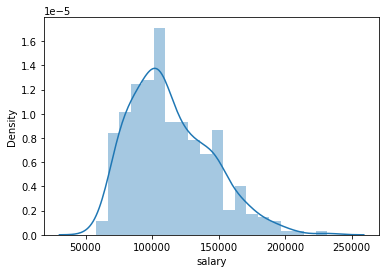

In [29]:
sns.distplot(df['salary'],bins=20)

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

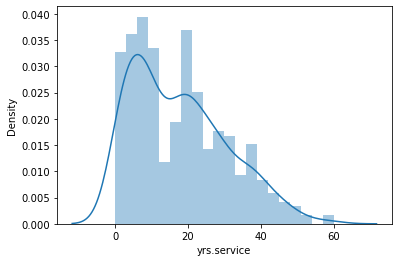

In [30]:
sns.distplot(df['yrs.service'],bins=20)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

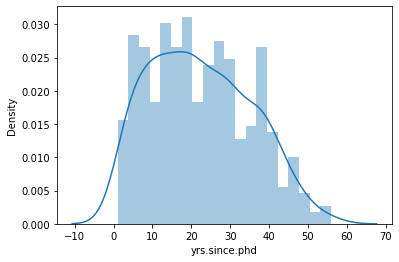

In [31]:
sns.distplot(df['yrs.since.phd'],bins=20)

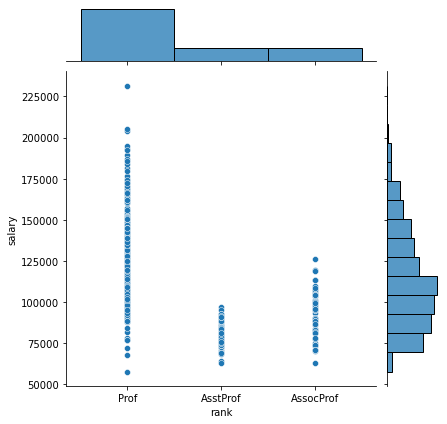

In [32]:
sns.jointplot(data=df,x='rank',y='salary')

<AxesSubplot:>

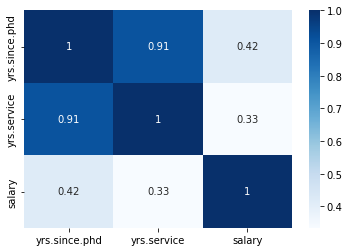

In [33]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)

# ENCODING THE RANK ,DISCIPLINE AND SEX THROUGH LABEL ENCODER

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
lencode=LabelEncoder()
df['sex']=lencode.fit_transform(df['sex'])
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,1,139750
1,Prof,B,20,16,1,173200
2,AsstProf,B,4,3,1,79750
3,Prof,B,45,39,1,115000
4,Prof,B,40,41,1,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,1,103106
393,Prof,A,31,19,1,150564
394,Prof,A,42,25,1,101738
395,Prof,A,25,15,1,95329


In [36]:
lencode=LabelEncoder()
df['rank']=lencode.fit_transform(df['rank'])
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,B,19,18,1,139750
1,2,B,20,16,1,173200
2,1,B,4,3,1,79750
3,2,B,45,39,1,115000
4,2,B,40,41,1,141500
...,...,...,...,...,...,...
392,2,A,33,30,1,103106
393,2,A,31,19,1,150564
394,2,A,42,25,1,101738
395,2,A,25,15,1,95329


In [37]:
lencode=LabelEncoder()
df['discipline']=lencode.fit_transform(df['discipline'])
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [38]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


# CHECKING THE DATATYPES AFTER ENCODING

In [39]:
df.dtypes

rank             int32
discipline       int32
yrs.since.phd    int64
yrs.service      int64
sex              int32
salary           int64
dtype: object

In [40]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


In [41]:
# Statistical summary of the dataset
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


In [42]:
df.nunique()

rank               3
discipline         2
yrs.since.phd     53
yrs.service       52
sex                2
salary           371
dtype: int64

In [43]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

In [44]:
#shape of the dataset
df.shape

(397, 6)

In [45]:
#info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   rank           397 non-null    int32
 1   discipline     397 non-null    int32
 2   yrs.since.phd  397 non-null    int64
 3   yrs.service    397 non-null    int64
 4   sex            397 non-null    int32
 5   salary         397 non-null    int64
dtypes: int32(3), int64(3)
memory usage: 14.1 KB


In [46]:
#checking the null values
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

There is no null values in this dataset

In [47]:

list(df.columns.values.tolist())

['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary']

In [48]:
from scipy import stats

In [49]:
print(df.dtypes)

rank             int32
discipline       int32
yrs.since.phd    int64
yrs.service      int64
sex              int32
salary           int64
dtype: object


All data types seem appropriate for their labels. 

In [50]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [51]:
x=df.iloc[:,:-1]
x

,rank,discipline,yrs.since.phd,yrs.service,sex
0,2,1,19,18,1
1,2,1,20,16,1
2,1,1,4,3,1
3,2,1,45,39,1
4,2,1,40,41,1
...,...,...,...,...,...
392,2,0,33,30,1
393,2,0,31,19,1
394,2,0,42,25,1
395,2,0,25,15,1


In [52]:
y=df.iloc[:,-1]
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

In [53]:
# Bifurcating the dataset into features and labels
x = df.iloc[:,0].values
y = df.iloc[:,-1].values
x = x.reshape(-1,1)
y = y.reshape(-1,1)

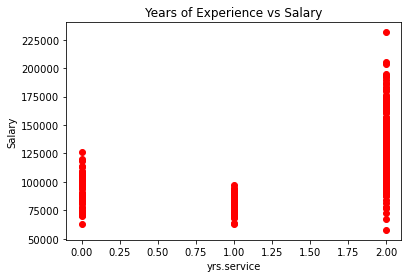

In [54]:
# Scatter Plot
plt.scatter(x,y,marker='o',color='red')
plt.title("Years of Experience vs Salary")
plt.xlabel("yrs.service")
plt.ylabel("Salary")
plt.show()

# CREATING TRAIN AND TEST SETS

In [55]:
# Splitting the variables as training and testing
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

In [56]:
from sklearn.linear_model import LinearRegression
# Instantiating the LinearRegression object
reg = LinearRegression()
print('success')

success


In [57]:
# Training the model
reg.fit(X_train,Y_train)

LinearRegression()

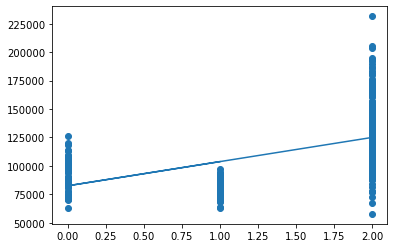

In [58]:
# Plotting the regression line
line = reg.coef_*x + reg.intercept_

plt.scatter(x,y)
plt.plot(x,line)
plt.show()

In [59]:
# Predicting the output
y_pred = reg.predict(X_test)
df = pd.DataFrame({'Predicted':np.around(y_pred.flatten(),decimals=0),'Actual':Y_test.flatten()})

     Predicted  Actual
0      82518.0  105000
1     103766.0   78785
2     125015.0  109000
3     103766.0   78500
4     125015.0  155865
..         ...     ...
115    82518.0   86895
116    82518.0  100938
117   125015.0  151575
118   125015.0  194800
119   125015.0  101100

[120 rows x 2 columns]


<AxesSubplot:>

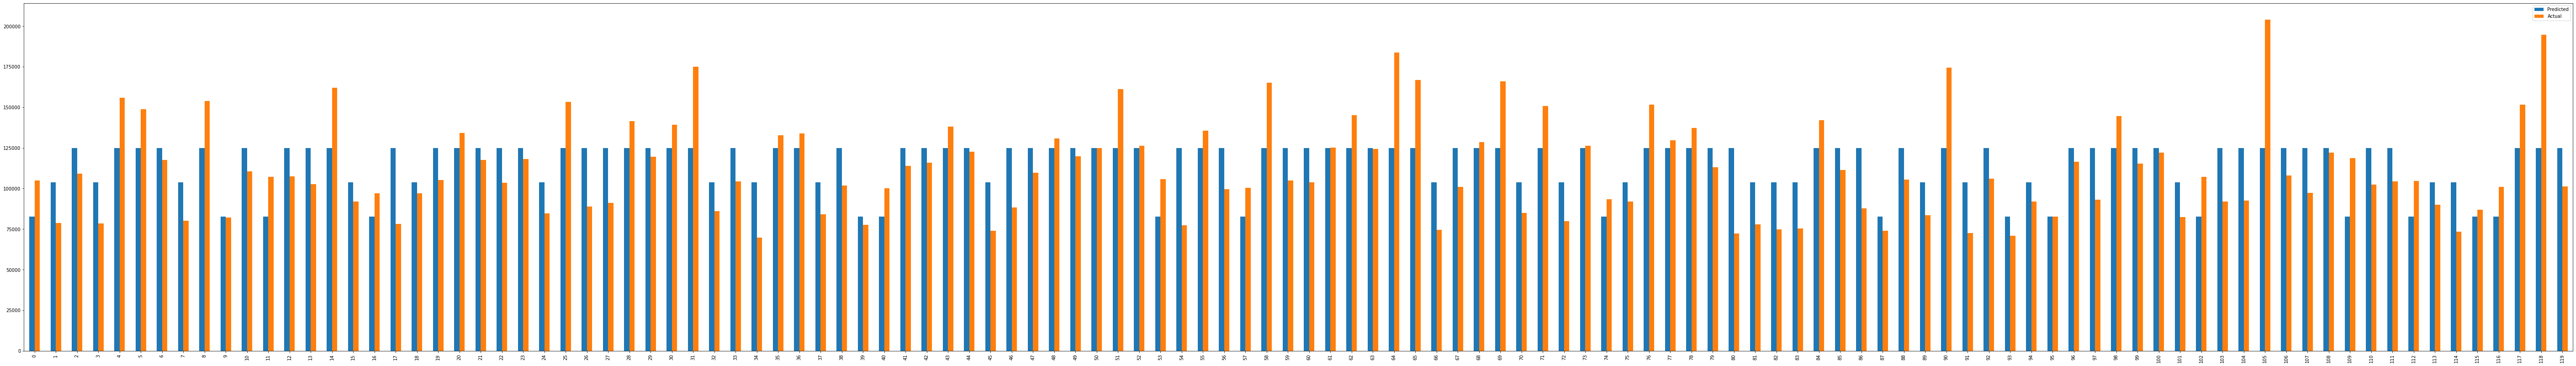

In [60]:
print(df)
df.plot(kind='bar',figsize=(100,14))

In [61]:
sal = reg.predict([[5]])
print("If a person has 5 years of experience then his salary would be approximate {}".format(sal[0]))

If a person has 5 years of experience then his salary would be approximate [188760.82142857]


In [62]:
from sklearn import metrics 
from sklearn.metrics import r2_score
print("Mean Absolute Error : ",round(metrics.mean_absolute_error(Y_test,y_pred),2))
print("R-squared  : ",r2_score(Y_test,y_pred))
print("Accuracy of the model : {} % ".format(round(reg.score(X_test,Y_test)*100,2)))

Mean Absolute Error :  21148.17
R-squared  :  0.23923815421341466
Accuracy of the model : 23.92 % 


In [63]:
df.corr()

,Predicted,Actual
Predicted,1.00000,0.49989
Actual,0.49989,1.00000
